# Import

In [1]:
import pandas as pd
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sn


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Example

In [46]:
# Get labeled data
data = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))
docs = data['data']
y = data['target']

In [49]:
y

array([10,  3, 17, ...,  3,  1,  7])

In [47]:
empty_dimensionality_model = BaseDimensionalityReduction()
clf = LogisticRegression()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Create a fully supervised BERTopic instance
topic_model= BERTopic(
        umap_model=empty_dimensionality_model,
        hdbscan_model=clf,
        ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y)

2024-04-26 12:46:59,912 - BERTopic - Transformed documents to Embeddings
2024-04-26 12:46:59,913 - BERTopic - The dimensionality reduction algorithm did not contain the `y` parameter and therefore the `y` parameter was not used
2024-04-26 12:46:59,914 - BERTopic - Reduced dimensionality
2024-04-26 12:47:03,247 - BERTopic - Clustered reduced embeddings


In [51]:
mappings = topic_model.topic_mapper_.get_mappings()
mappings = {value: data["target_names"][key] for key, value in mappings.items()}

# Assign original classes to our topics
df = topic_model.get_topic_info()
df["Class"] = df.Topic.map(mappings)
df

,Topic,Count,Name,Class
0,0,999,0_game_hockey_team_25,rec.sport.hockey
1,1,997,1_god_church_jesus_christ,soc.religion.christian
2,2,996,2_bike_dod_ride_bikes,rec.motorcycles
3,3,994,3_baseball_game_he_year,rec.sport.baseball
4,4,991,4_key_encryption_db_clipper,sci.crypt
5,5,990,5_car_cars_engine_ford,rec.autos
6,6,990,6_medical_patients_cancer_disease,sci.med
7,7,988,7_window_server_widget_motif,comp.windows.x
8,8,987,8_space_launch_nasa_orbit,sci.space
9,9,985,9_maxaxaxaxaxaxaxaxaxaxaxaxaxaxax_windows_dos_...,comp.os.ms-windows.misc


# Data

In [3]:
rawdata = pd.read_csv('./datasets/1_BERTopic_labels.csv', encoding='utf-8')
rawdata

,Text,Topic,Number
0,the default visual settings are not great.,1.3.1. Graphics settings,1
1,everything is big even at high resolution like...,1.3.1. Graphics settings,1
2,no matter how much I try to change game settin...,1.3.1. Graphics settings,1
3,can only play the game at medium graphics sett...,1.3.1. Graphics settings,1
4,Everything I would hoped for.it would be nice ...,1.3.1. Graphics settings,1
...,...,...,...
3106,"No Man's Sky (NMS) is a vast, detailed, atmosp...",Visual and atmosphere,62
3107,The different levels not only all have a entir...,Visual and atmosphere,62
3108,The game is massive and beautiful,Visual and atmosphere,62
3109,"The maps are very atmospheric, and for example...",Visual and atmosphere,62


# Evaluation

In [5]:
train=rawdata.sample(frac=0.7,random_state=2000)
test=rawdata.drop(train.index)

In [6]:
train

,Text,Topic,Number
2415,"No idea who these people are, how many hostage...",Learnability,52
1048,I have been playing this on an older laptop an...,Bugs & Crashing,40
983,I enjoyed the radio and p.a.,Audio,39
1221,I would recommend something like Subnautica or...,Comparison,41
1401,The developers have done an awesome job,Developer,43
...,...,...,...
2853,"Afterwards I was shadow banned, kicked from t...",Server,59
1186,you only use one save per franchise,Bugs & Crashing,40
2797,but overall I def recommend this game!,Recommendation,58
3035,"it follows the same art and animation, but thi...",Visual and atmosphere,62


In [7]:
test

,Text,Topic,Number
1,everything is big even at high resolution like...,1.3.1. Graphics settings,1
3,can only play the game at medium graphics sett...,1.3.1. Graphics settings,1
4,Everything I would hoped for.it would be nice ...,1.3.1. Graphics settings,1
6,"needs options for aa methods, post process eff...",1.3.1. Graphics settings,1
9,"Ground not loading in, textures being displaye...",1.3.1. Graphics settings,1
...,...,...,...
3099,I am in love - every environment is absolutel...,Visual and atmosphere,62
3102,I know that this is a game focused on procedur...,Visual and atmosphere,62
3104,its insanely cool how not only the formula of ...,Visual and atmosphere,62
3108,The game is massive and beautiful,Visual and atmosphere,62


<Axes: ylabel='Topic'>

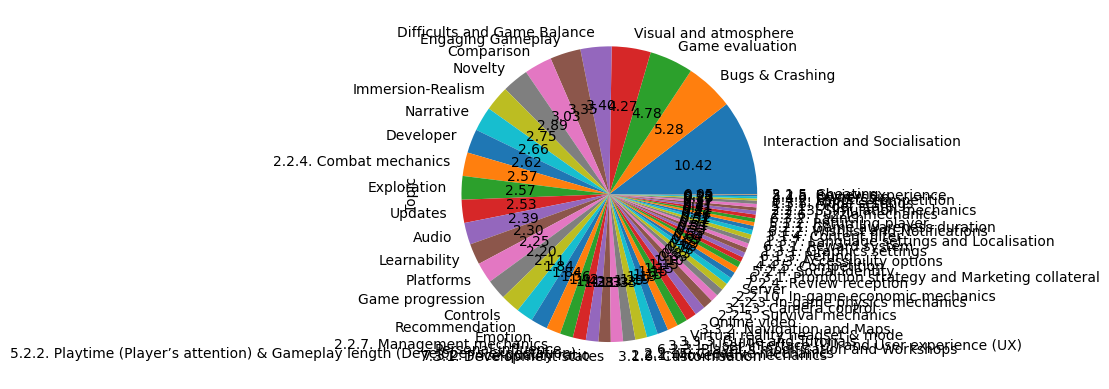

In [8]:
train.Topic.value_counts().plot(kind = 'pie', autopct="%.2f")

<Axes: ylabel='Topic'>

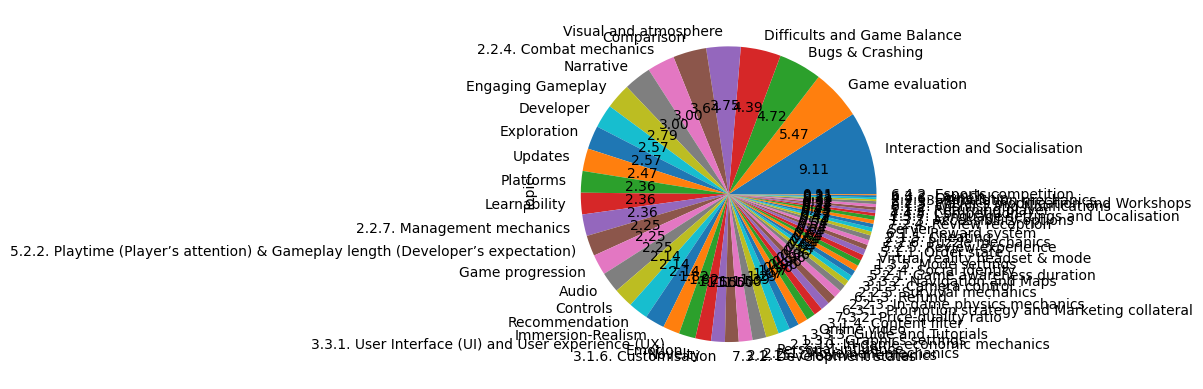

In [9]:
test.Topic.value_counts().plot(kind = 'pie', autopct="%.2f")

In [25]:
train.to_csv('./datasets/train.csv',index=False)
test.to_csv('./datasets/test.csv',index=False)

In [4]:
train = pd.read_csv('./datasets/train.csv', encoding='utf-8')

# Train

In [4]:
docs=rawdata['Text']
y = rawdata["Number"]
y_names = rawdata["Topic"]

In [5]:
empty_dimensionality_model = BaseDimensionalityReduction()
clf = LogisticRegression()
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Create a fully supervised BERTopic instance
topic_model= BERTopic(
        umap_model=empty_dimensionality_model,
        hdbscan_model=clf,
        ctfidf_model=ctfidf_model
)
topics, probs = topic_model.fit_transform(docs, y=y)

In [7]:
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "content":rawdata['Text'],
                          "labels":rawdata["Topic"],
                          "Topic": topics})


documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

documents.to_csv('./datasets/train-BERTopic_reflect.csv',index=False)

In [9]:
# Map input `y` to topics
mappings = topic_model.topic_mapper_.get_mappings()
mappings = {value: rawdata["Number"][key] for key, value in mappings.items()}

In [10]:
# Assign original classes to our topics
df = topic_model.get_topic_info()
df["Class"] = df.Topic.map(mappings)
df

,Topic,Count,Name,Class
0,0,312,0_ai_friends_multiplayer_players,4
1,1,159,1_bugs_save_performance_crashes,3
2,2,155,2_shooter_best_genre_overall,3
3,3,128,3_graphics_photo_visuals_vibrant,4
4,4,115,4_difficulty_difficult_challenging_challenge,3
...,...,...,...,...
57,57,10,57_simulator_simulation_orthographic_capitalize,1
58,58,9,58_reviewed_review_positive_gave,2
59,59,7,59_settles_transportation_own_town,2
60,60,6,60_esport_dota_esports_scene,2


In [29]:
df.to_csv('./datasets/train-BERTopic.csv',index=False)

In [28]:
df = pd.read_csv('BERTopic.csv', encoding='utf-8')

# Prediction for text

In [11]:
similar_topics, similarity = topic_model.find_topics("No Man's Sky is a truly open universe.", top_n=5)

In [12]:
similar_topics

[37, 10, 33, 32, 3]

In [13]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(topic_model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0])) 

Most Similar Topic Info: 
[('physics', 0.5829567932962332), ('gravity', 0.3904717166939964), ('impact', 0.37500514795286477), ('orbit', 0.3711534957500044), ('solar', 0.35423674345388445), ('destruction', 0.330136672362021), ('line', 0.3192985857392233), ('bullet', 0.316952404110601), ('planets', 0.30215706442090134), ('exaggerated', 0.2914886374567345)]
Similarity Score: 0.23344229508572797


## Test dataset

In [20]:
test = pd.read_csv('./datasets/NMSendataset_wordtoken_lda_2023.csv', encoding='utf-8')

In [21]:
test

,_id,recommend,found_helpful,found_funny,Column1,time,reply_count,content,hrs_on_second,hrs_at_reviwer_time,reviwer_num,language,sent_content,preprocessed_reviews_sec,wordtoken,correctmapping,correctmapping_no,preprocessed_reviews_lda
0,5f75ad269136b25c3c8b50f8,True,1,0,9,28/02/2023,0,\r\n\t\t\t\t\t\t\t\tthis good\t\t\t\t\t\t\t,0.5,37.9,15,en,\r\n\t\t\t\t\t\t\t\tthis good,this good,['good'],"['this', 'good']",this good,good
1,5f771cbbee89a0be76bd8c80,True,1,0,9,28/02/2023,0,\r\n\t\t\t\t\t\t\t\tWhat a difference a few ye...,19.4,352.6,16,en,\r\n\t\t\t\t\t\t\t\tWhat a difference a few ye...,what a difference a few year make .,"['difference', 'year']","['what', 'difference', 'few', 'year', 'make']",what difference few year make,difference year make
2,5f771cbbee89a0be76bd8c80,True,1,0,9,28/02/2023,0,\r\n\t\t\t\t\t\t\t\tWhat a difference a few ye...,19.4,352.6,16,en,"From its messy origins, No Man's Sky has grown...",from it messy origin: no man be sky have grown...,"['messy', 'origin', 'no_man_sky', 'grown', 'de...","['from', 'it', 'messy', 'origin', 'no', 'man',...",from it messy origin no man be sky have grown ...,messy origin no man sky grown deeper polished ...
3,5f771cbbee89a0be76bd8c80,True,1,0,9,28/02/2023,0,\r\n\t\t\t\t\t\t\t\tWhat a difference a few ye...,19.4,352.6,16,en,"The vast universe is enticing, and there's ple...",the vast universe be entice: and there be plen...,"['vast', 'universe', 'entice', 'plenty', 'most...","['the', 'vast', 'universe', 'be', 'entice', 'a...",the vast universe be entice and there be plent...,vast universe entice plenty mostly either expl...
4,5f771cbbee89a0be76bd8c80,True,1,0,9,28/02/2023,0,\r\n\t\t\t\t\t\t\t\tWhat a difference a few ye...,19.4,352.6,16,en,"And with proper multiplayer now introduced, it...",and with proper multiplayer now introduce: it ...,"['proper', 'multiplayer', 'introduce', 'lonely...","['and', 'with', 'proper', 'multiplayer', 'now'...",and with proper multiplayer now introduce it d...,proper multiplayer introduce lonely experience...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476338,64abdb8a38d28815033e7a39,False,0,0,5,12/08/2016,1,\r\n\t\t\t\t\t\t\t\tThis isn't a PC game. It'...,0.0,44.9,37,en,"If the game was $20 I'd keep it, but definitel...",if the game be $ 20 i would keep it: but defin...,"['20', 'would', 'definitely', 'worth_60', 'ref...","['if', 'the', 'game', 'be', '20', 'would', 'ke...",if the game be 20 would keep it but definitely...,20 would keep definitely worth 60 refund time
476339,64abf8e1b4d8ae53485d2c42,True,0,0,5,12/08/2016,0,\r\n\t\t\t\t\t\t\t\tIt's pretty interesting\t\...,0.0,23.2,42,en,\r\n\t\t\t\t\t\t\t\tIt's pretty interesting,\r\n it be pretty interest,"['pretty', 'interest']","['it', 'be', 'pretty', 'interest']",it be pretty interest,pretty interest
476340,64ac11efb4d8ae53485d2c6b,False,0,0,5,12/08/2016,2,\r\n\t\t\t\t\t\t\t\tI dislike the fact that al...,0.0,53.4,17,en,\r\n\t\t\t\t\t\t\t\tI dislike the fact that al...,\r\n i dislike the fact that all the creature ...,"['dislike', 'fact', 'creature', 'promise', 'cr...","['dislike', 'the', 'fact', 'that', 'all', 'the...",dislike the fact that all the creature that be...,dislike fact creature promise creature keep sh...
476341,64ac11efb4d8ae53485d2c6b,False,0,0,5,12/08/2016,2,\r\n\t\t\t\t\t\t\t\tI dislike the fact that al...,0.0,53.4,17,en,Please add the creatures into the game.,please add the creature into the game .,"['please', 'add', 'creature']","['please', 'add', 'the', 'creature', 'into', '...",please add the creature into the game,please add creature


In [22]:
new_docs=test['correctmapping_no']

In [23]:
topics, probs = topic_model.transform(new_docs)

In [25]:
documents = pd.DataFrame({"Document": new_docs,
                          "time":test["time"],
                          "found_helpful":test["found_helpful"],
                          "found_funny":test["found_funny"],
                          "recommend":test["recommend"],
                          "Topic": topics})

In [26]:
# Preprocess Documents

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

In [27]:
documents

,Document,time,found_helpful,found_funny,recommend,Topic
0,this good,28/02/2023,1,0,True,0
1,what difference few year make,28/02/2023,1,0,True,13
2,from it messy origin no man be sky have grown ...,28/02/2023,1,0,True,9
3,the vast universe be entice and there be plent...,28/02/2023,1,0,True,10
4,and with proper multiplayer now introduce it d...,28/02/2023,1,0,True,0
...,...,...,...,...,...,...
476338,if the game be 20 would keep it but definitely...,12/08/2016,0,0,False,29
476339,it be pretty interest,12/08/2016,0,0,True,0
476340,dislike the fact that all the creature that be...,12/08/2016,0,0,False,0
476341,please add the creature into the game,12/08/2016,0,0,False,0


## replace class

In [28]:
Labels={
 0: "Interaction and Socialisation",
1: "Bugs & Crashing",
2: "Game evaluation",
3: "Visual and atmosphere",
4: "Difficults and Game Balance",
5: "Comparison",
6: "Engaging Gameplay",
7: "Narrative",
8: "Combat mechanics",
9: "Developer",
10: "Exploration",
11: "Immersion & Realism",
12: "Novelty",
13: "Updates",
14: "Audio",
15: "Learnability",
16: "Platforms",
17: "Game progression",
18: "Controls",
19: "Recommendation",
20: "Emotion",
21: "Management mechanics",
22: "Playtime & Gameplay length",
23: "Personal-influence",
24: "User Interface and User experience",
25: "Development states",
26: "Customisation",
27: "Movement mechanics",
28: "Creative mechanics",
29: "Price-quality ratio",
30: "Guide and Tutorials",
31: "Online video",
32: "Navigation and Maps",
33: "Virtual reality headset & mode",
34: "Survival mechanics",
35: "Players modification and Workshops",
36: "In-game economic mechanics",
37: "In-game physics mechanics",
38: "Promotion strategy and Marketing collateral",
39: "Camera control",
40: "Graphics settings",
41: "Server",
42: "Social identity",
43: "Content filter",
44: "Review reception",
45: "Refund",
46: "Accessibility options",
47: "Game awareness duration",
48: "Competition",
49: "Reward system",
50: "Puzzle mechanics",
51: "Mode settings",
52: "Language settings and Localisation",
53: "Order state",
54: "Wishlist and Notifications",
55: "Returning player",
56: "Launch",
57: "Simulation mechanics",
58: "Review experience",
59: "Ownership",
60: "Esports competition",
61: "Cheating",
}

In [29]:
documents['topic_numerber']=documents['Topic']
documents=documents.replace({"Topic": Labels})

In [30]:
documents

,Document,time,found_helpful,found_funny,recommend,Topic,topic_numerber
0,this good,28/02/2023,1,0,True,Interaction and Socialisation,0
1,what difference few year make,28/02/2023,1,0,True,Updates,13
2,from it messy origin no man be sky have grown ...,28/02/2023,1,0,True,Developer,9
3,the vast universe be entice and there be plent...,28/02/2023,1,0,True,Exploration,10
4,and with proper multiplayer now introduce it d...,28/02/2023,1,0,True,Interaction and Socialisation,0
...,...,...,...,...,...,...,...
476338,if the game be 20 would keep it but definitely...,12/08/2016,0,0,False,Price-quality ratio,29
476339,it be pretty interest,12/08/2016,0,0,True,Interaction and Socialisation,0
476340,dislike the fact that all the creature that be...,12/08/2016,0,0,False,Interaction and Socialisation,0
476341,please add the creature into the game,12/08/2016,0,0,False,Interaction and Socialisation,0


In [31]:
documents.to_csv('./datasets/NMS-BERTopic.csv',index=False)

In [17]:
documents[documents['labels'] != documents['Topic']]

,Document,content,labels,Topic,topic_numerber
0,the default visual settings are not great.,the default visual settings are not great.,1.3.1. Graphics settings,Graphics settings,40
1,everything is big even at high resolution like...,everything is big even at high resolution like...,1.3.1. Graphics settings,Graphics settings,40
2,no matter how much I try to change game settin...,no matter how much I try to change game settin...,1.3.1. Graphics settings,Graphics settings,40
3,can only play the game at medium graphics sett...,can only play the game at medium graphics sett...,1.3.1. Graphics settings,Graphics settings,40
4,Everything I would hoped for.it would be nice ...,Everything I would hoped for.it would be nice ...,1.3.1. Graphics settings,Graphics settings,40
...,...,...,...,...,...
2090,"Really immersive, dark, and has zero filter wi...","Really immersive, dark, and has zero filter wi...",Immersion-Realism,Immersion & Realism,11
2091,all of the maladies are for the most part fict...,all of the maladies are for the most part fict...,Immersion-Realism,Immersion & Realism,11
2092,I LOVE this game. It demonstrates the difficul...,I LOVE this game. It demonstrates the difficul...,Immersion-Realism,Immersion & Realism,11
2093,now this opinion of mine comes with some cavea...,now this opinion of mine comes with some cavea...,Immersion-Realism,Immersion & Realism,11


In [212]:
from sklearn.metrics import confusion_matrix

y_actu = documents['labels']
y_pred = documents['Topic']


In [213]:
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [214]:
df_confusion

Predicted,Audio,Bugs & Crashing,Camera control,Combat mechanics,Comparison,Content filter,Controls,Creative mechanics,Customisation,Developer,...,Review reception,Reward system,Server,Survival mechanics,Updates,User Interface (UI) and User experience (UX),Virtual reality headset & mode,Visual and atmosphere,Wishlist and Notifications,All
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,4
Audio,19,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
Bugs & Crashing,0,38,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,44
Camera control,0,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,6
Cheating,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User Interface (UI) and User experience (UX),0,1,0,0,0,0,2,0,1,0,...,0,0,0,0,1,5,0,1,0,17
Virtual reality headset & mode,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,5,0,0,6
Visual and atmosphere,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,26,0,35


In [215]:
df_confusion =df_confusion[:62]
df_confusion= df_confusion.drop('All', axis=1)
df_confusion

Predicted,Audio,Bugs & Crashing,Camera control,Combat mechanics,Comparison,Content filter,Controls,Creative mechanics,Customisation,Developer,...,Refund,Review reception,Reward system,Server,Survival mechanics,Updates,User Interface (UI) and User experience (UX),Virtual reality headset & mode,Visual and atmosphere,Wishlist and Notifications
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
Audio,19,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bugs & Crashing,0,38,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
Camera control,0,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Cheating,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Updates,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,17,0,0,0,0
User Interface (UI) and User experience (UX),0,1,0,0,0,0,2,0,1,0,...,0,0,0,0,0,1,5,0,1,0
Virtual reality headset & mode,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,5,0,0


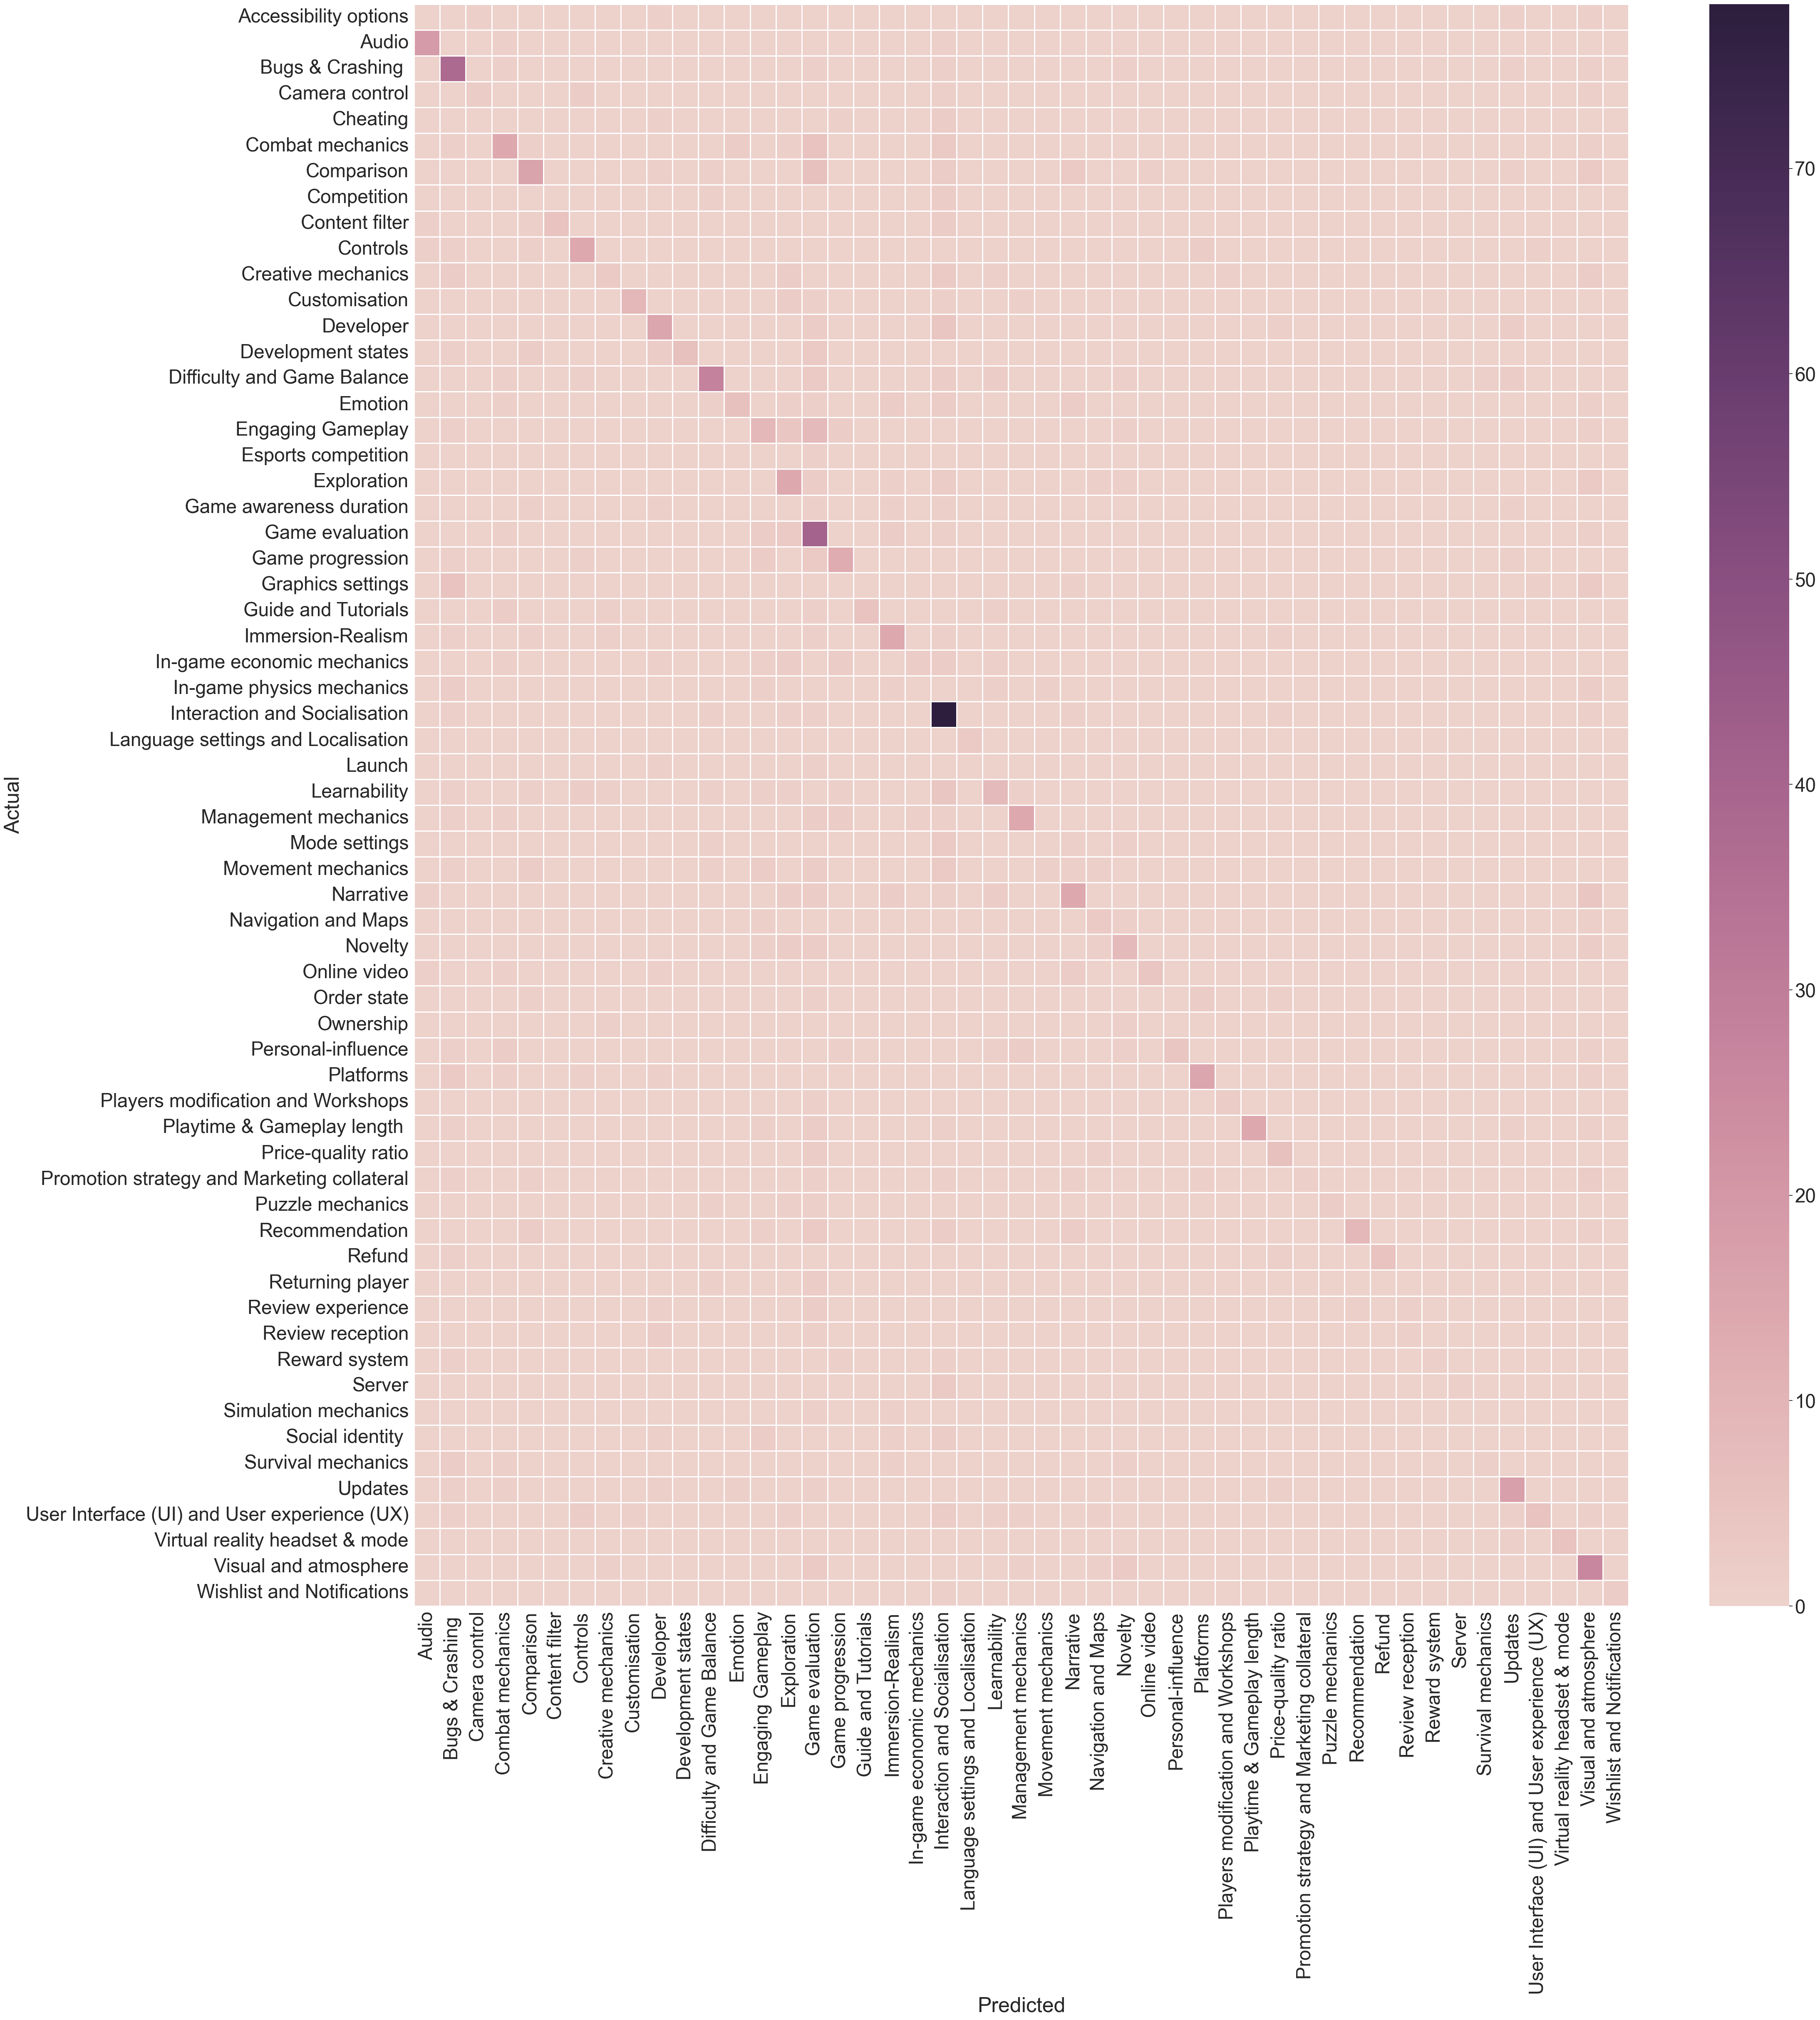

In [216]:
plt.figure(figsize = (50,50))
  
sn.set(font_scale=3) # for label size 
sn.heatmap(df_confusion,  annot_kws={"size": 22}, cmap=sn.cubehelix_palette(as_cmap=True), fmt=".2f", square=True, linewidths=1, linecolor = "white")

plt.show()

In [200]:
# df_confusion.to_csv('./datasets/df_confusion.csv', index=False)

In [217]:
from sklearn.preprocessing import minmax_scale
df_confusion[:] = minmax_scale(df_confusion)

In [218]:
df_confusion

Predicted,Audio,Bugs & Crashing,Camera control,Combat mechanics,Comparison,Content filter,Controls,Creative mechanics,Customisation,Developer,...,Refund,Review reception,Reward system,Server,Survival mechanics,Updates,User Interface (UI) and User experience (UX),Virtual reality headset & mode,Visual and atmosphere,Wishlist and Notifications
Actual,,,,,,,,,,,,,,,,,,,,,
Accessibility options,0.0,0.000000,0.5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.038462,0.0
Audio,1.0,0.000000,0.0,0.071429,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
Bugs & Crashing,0.0,1.000000,0.0,0.071429,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.038462,0.0
Camera control,0.0,0.000000,1.0,0.000000,0.0,0.0,0.142857,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.038462,0.0
Cheating,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Updates,0.0,0.026316,0.0,0.071429,0.0,0.0,0.000000,0.000000,0.000000,0.066667,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0
User Interface (UI) and User experience (UX),0.0,0.026316,0.0,0.000000,0.0,0.0,0.142857,0.000000,0.111111,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.058824,1.0,0.0,0.038462,0.0
Virtual reality headset & mode,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,1.0,0.000000,0.0


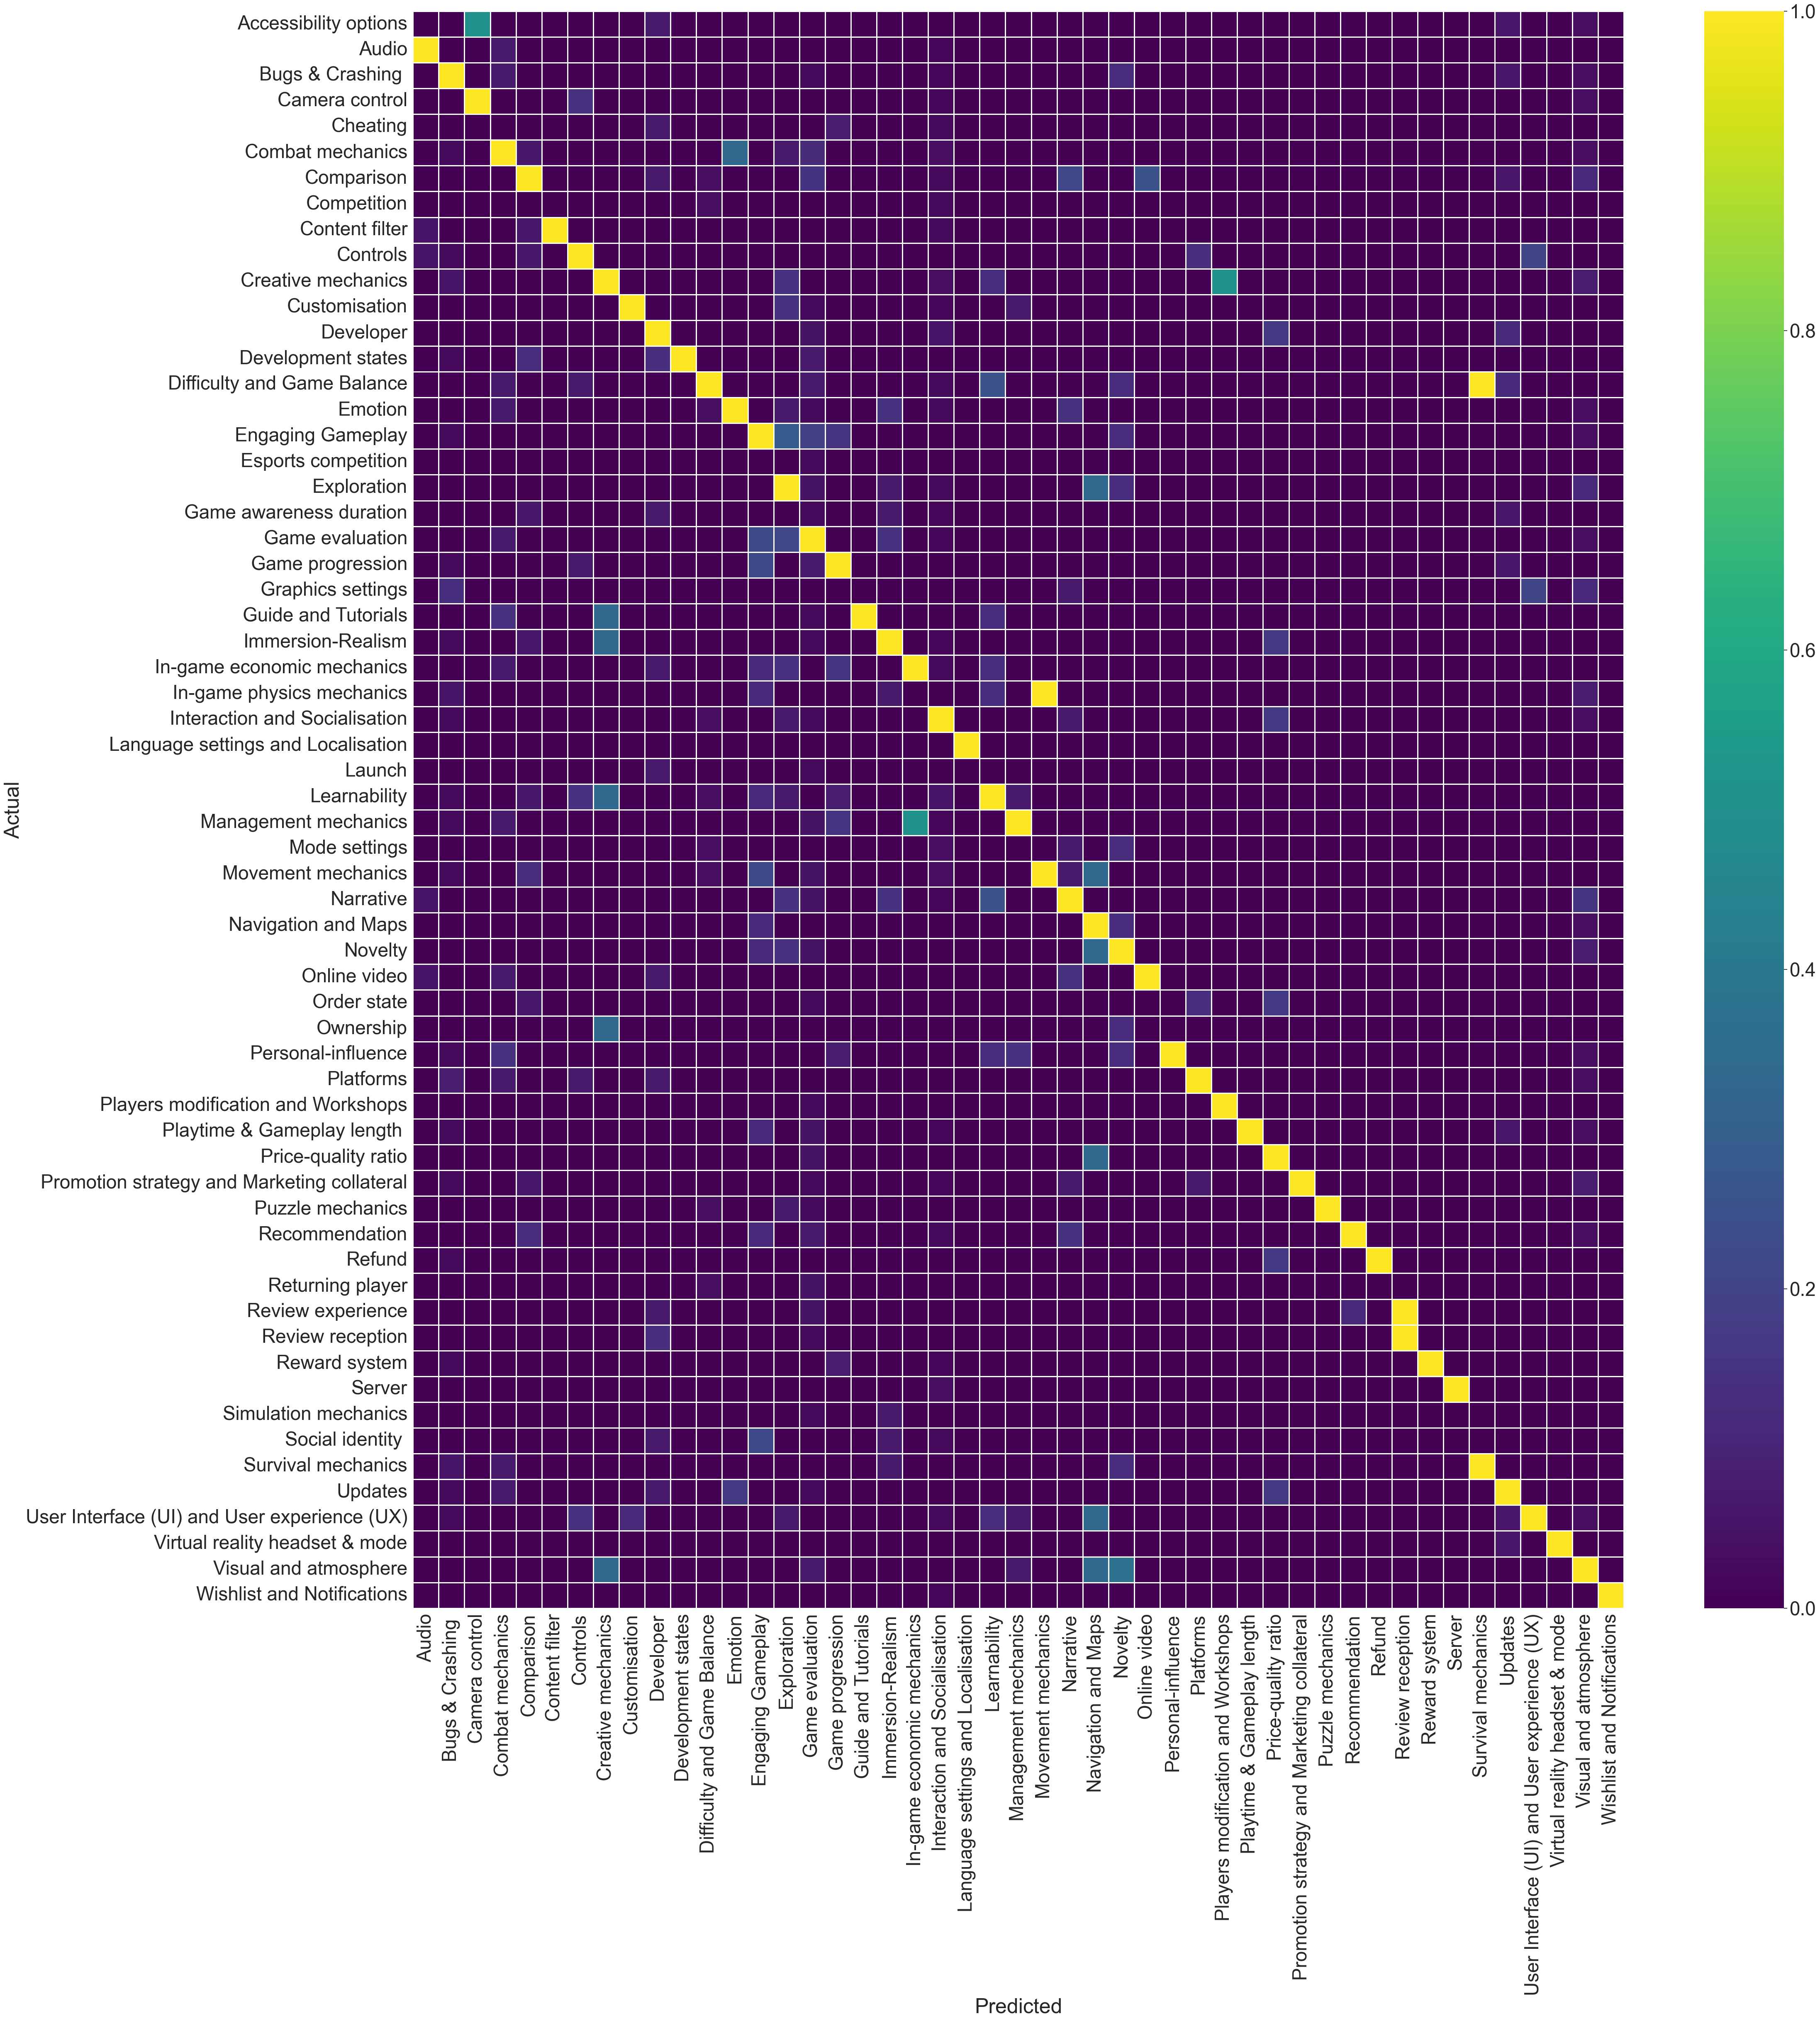

In [219]:
plt.figure(figsize = (50,50))
  
sn.set(font_scale=3) # for label size 
sn.heatmap(df_confusion,  annot_kws={"size": 22}, cmap="viridis", fmt=".2f", square=True, linewidths=1, linecolor = "white")

plt.show()